# Dummy Code Of Kaggle

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# DATA LOADING

**1. Importing Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2. Loading and Previewing the Dataset**

In [3]:
train =  pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
train.head(20)


,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
5,2009-05-07,25,entrepreneur,single,tertiary,no,140,yes,no,cellular,348,1,-1,0,NaN,no
6,2009-05-15,46,blue-collar,married,secondary,no,668,yes,no,NaN,1263,2,-1,0,NaN,yes
7,2010-05-08,37,admin.,married,secondary,no,14,yes,no,NaN,176,2,-1,0,NaN,no
8,2008-12-13,38,unemployed,divorced,primary,yes,14123,yes,yes,cellular,2370,4,852,4,other,no
9,2010-05-21,31,technician,married,secondary,no,589,yes,yes,NaN,151,1,-1,0,NaN,no


# Exploratory Data Analysis (EDA)

**3. Checking Unique Values in the Target Column**

In [4]:
train['target'].unique()

array(['no', 'yes'], dtype=object)

So, it is a binary classification problem.

**4. Checking Distribution of Target Variable**

In [5]:
train['target'].value_counts()

target
no     33384
yes     5827
Name: count, dtype: int64

So, the Dataset is **highly imbalanced**.

**5. Checking Dataset Dimensions**

In [6]:
train.shape

(39211, 16)

**6. Checking for Missing Values in the Dataset**

In [7]:
train.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

So. here we can see that in the column name 'contact' there is more than 25% values are missing and in the column name 'poutcome' there is more than 75% values are missing.

**7. Checking Datatypes of Columns**

In [8]:
train.dtypes

last contact date    object
age                   int64
job                  object
marital              object
education            object
default              object
balance               int64
housing              object
loan                 object
contact              object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
target               object
dtype: object

Here, we can see that,
* Categorical Column :- last contact date, job, marital, education, default, housing, loan, contact, poutcome, target.
* Numerical Column :- age, balance, duration, campaign, pdays, previous

**Statistical Description**

**8. Statistical Summary of the Dataset**

In [9]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


**9. Statistical Summary of Categorical Columns**

In [10]:
train.describe(include=['object'])

,last contact date,job,marital,education,default,housing,loan,contact,poutcome,target
count,39211,38982,39211,37744,39211,39211,39211,28875,9760,39211
unique,1013,11,3,3,2,2,2,2,3,2
top,2009-05-15,blue-collar,married,secondary,no,yes,no,cellular,failure,no
freq,313,7776,22691,19584,36954,21657,31820,25030,4949,33384


**10. Correlation Heatmap of Numeric Features in the Training Data**

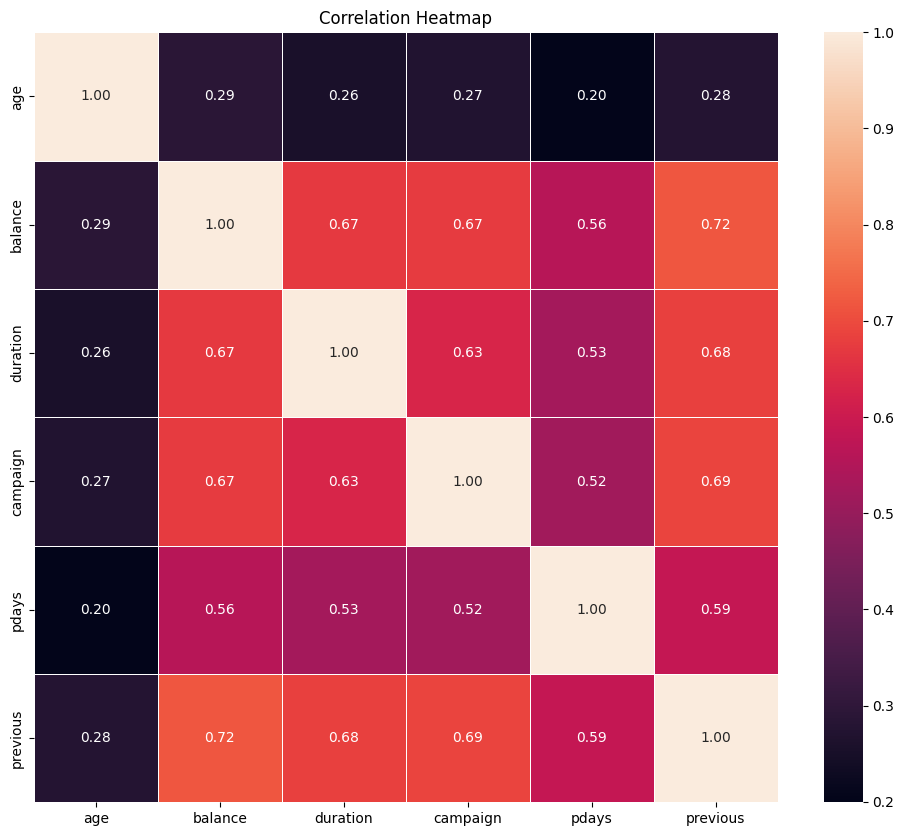

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df = train.copy()


numeric_columns = df.select_dtypes(include=['int64']).columns


correlation_matrix = df[numeric_columns].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Age

**11. Visualizing Age Distribution**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Age')

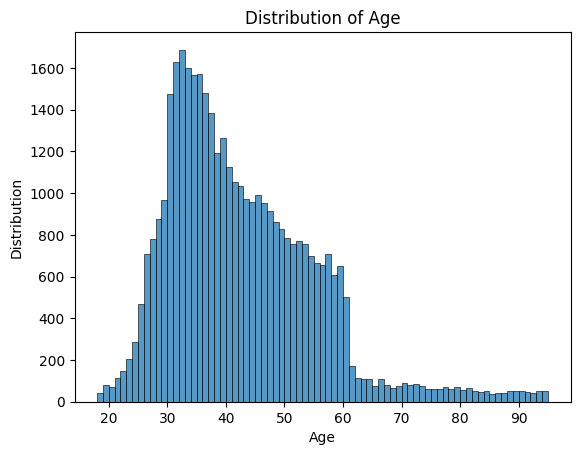

In [12]:
import seaborn as sns
ax = sns.histplot(train,x="age")
ax.set_xlabel("Age")
ax.set_ylabel("Distribution")
ax.set_title("Distribution of Age")

The histogram shows that most individuals are concentrated between the ages of 25 and 45, with a gradual decline in frequency as age increases. Older age groups are less represented, indicating that the dataset has a younger population.

**12. Visualizing Age Distribution by Target Category**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Distribution of Age')

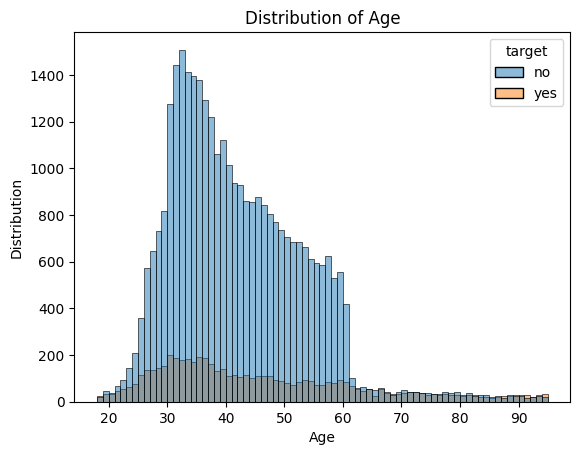

In [13]:
ax = sns.histplot(train,x="age",hue="target")
ax.set_xlabel("Age")
ax.set_ylabel("Distribution")
ax.set_title("Distribution of Age")

The histogram shows that the "no" target group (indicating failure) is more prevalent across most age groups, especially between 25 and 45. The "yes" target group (indicating success) is significantly less frequent and appears mainly in the younger age range, peaking in the 30s. This suggests that younger individuals are more likely to have a positive outcome.

Younger people are more targeted than older people.

**13. Outliers of Age**

Text(0.5, 1.0, 'Boxplot of Age')

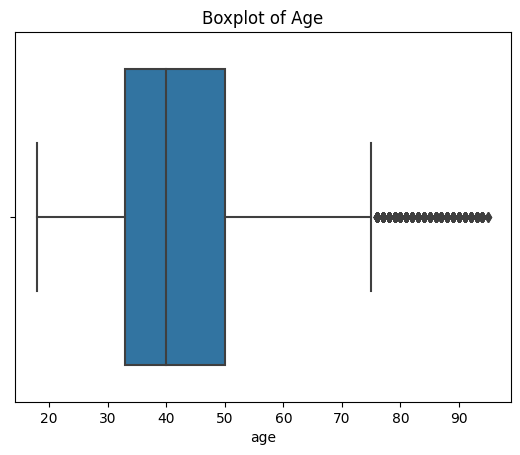

In [14]:
ax = sns.boxplot(train,x="age")
ax.set_title("Boxplot of Age")

The boxplot indicates that the median age is around 40 years, with the interquartile range (IQR) between approximately 30 and 50 years. There are several outliers on the higher end, suggesting that there are individuals significantly older than the main distribution. The distribution is relatively symmetrical, with no major skewness.

**14. Distribution of Marital**

Text(0.5, 1.0, 'Distribution of Marital')

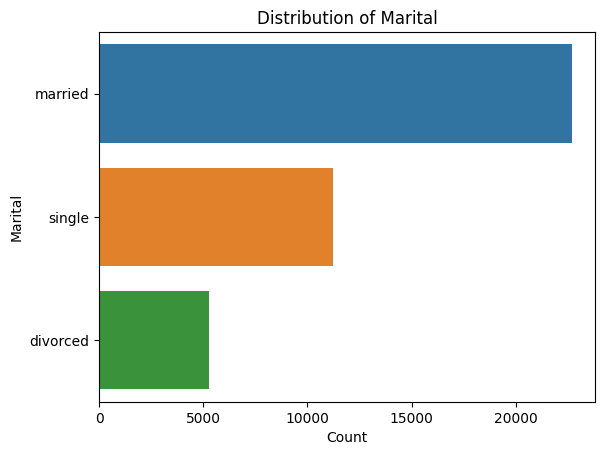

In [15]:
ax = sns.countplot(train,y="marital")
ax.set_xlabel("Count")
ax.set_ylabel("Marital")
ax.set_title("Distribution of Marital")

The majority of individuals in the dataset are married, followed by single individuals, and then divorced individuals.

# Data Cleaning

**15. Cleaning the data**

***Dropping Unnecessary Columns***

In [16]:
train.drop(['contact','poutcome'],axis=1,inplace=True)

**16. Checking for Missing Data in the Dataset**

In [17]:
train.isnull().sum()

last contact date       0
age                     0
job                   229
marital                 0
education            1467
default                 0
balance                 0
housing                 0
loan                    0
duration                0
campaign                0
pdays                   0
previous                0
target                  0
dtype: int64

**17. Checking Dataset Dimensions after dropping the columns**

In [18]:
train.shape

(39211, 14)

#  Preprocessing 

**18. Splitting the Data into Feature and Label Vector**

In [19]:
y = train.target.copy()
X = train.drop("target",axis=1)

**19. Splitting the data into Training and Validation**

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

**20. Exploring Data Types of Features in the Training Set**

In [21]:
for i,j in enumerate(list(X_train.columns)):
    print(i,j,X_train[j].dtypes)

0 last contact date object
1 age int64
2 job object
3 marital object
4 education object
5 default object
6 balance int64
7 housing object
8 loan object
9 duration int64
10 campaign int64
11 pdays int64
12 previous int64


**21. Selecting Numeric and Categorical Features in the Dataset**

In [22]:
from sklearn.compose import make_column_selector as mcs
num_sel = mcs(dtype_exclude="object")
cat_sel = mcs(dtype_include="object")


**22. Catergorical : OneHotEncoder,**
**Numerical : StandardScalar**

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_pipe = Pipeline([("imputer",SimpleImputer(strategy="most_frequent")),
                             ("ohe",OneHotEncoder(handle_unknown="ignore",sparse_output=False))])


cat_trf = ColumnTransformer([('cat',cat_pipe,[0,2,3,4,5,7,8])],
                           remainder= "passthrough").set_output(transform="pandas")

num_pipe = Pipeline([("imputer",SimpleImputer(strategy="mean")),
                             ("std",StandardScaler())])

num_trf = ColumnTransformer([('num',num_pipe,[1,6,9,10,11,12])],
                           remainder= "passthrough").set_output(transform="pandas")

pipe = Pipeline([("cat_pipe", cat_trf),
                 ('num_pipe',num_trf)])

pipe.fit(X_train)


Pipeline(steps=[('cat_pipe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [0, 2, 3, 4, 5, 7, 8])])),
                ('num_pipe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  [1, 6, 9, 10, 11, 12])]))])

**23. Transforming Training and Test Data Using the Pipeline**

In [24]:
X_train_trf = pipe.transform(X_train)
X_test_trf = pipe.transform(X_test)

**24. Checking the Shape of Transformed Data**

In [25]:
print(X_train_trf.shape)
print(X_test_trf.shape)

(35289, 1040)
(3922, 1040)


# Feature Engineering

**25. Feature Selection Using SelectKBest with f_classif**

In [26]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
SelectKBest_selector = SelectKBest(f_classif,k=100)
SelectKBest_selector.fit(X_train_trf,y_train)

SelectKBest(k=100)

**26. Transforming Data with Selected Features**

In [27]:
X_train_selected = SelectKBest_selector.transform(X_train_trf)
X_test_selected = SelectKBest_selector.transform(X_test_trf)

# Selector Pipeline

**27. Function for Feature Selection using a Given Selector Method**

In [28]:
def selector_method(selector,X_train_trf,X_test_trf,y_train):
    
    selector.fit(X_train_trf,y_train)
    X_train_selected = selector.transform(X_train_trf)
    X_test_selected = selector.transform(X_test_trf)
    return X_train_selected,X_test_selected

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(max_iter=1000)
selector = SelectFromModel(estimator, max_features=100)

The code provided sets up feature selection using the SelectFromModel class from sklearn.feature_selection. It utilizes a LogisticRegression estimator to determine which features to select based on their importance.

In [30]:
X_train_selected,X_test_selected = selector_method(selector,X_train_trf,X_test_trf,y_train)

The line of code you provided applies the selector_method function to perform feature selection on the training and testing data

In [31]:
X_train_selected

array([[-1.50582516e-02, -9.22060489e-03, -1.50582516e-02, ...,
         0.00000000e+00,  3.00000000e+01,  3.00000000e+00],
       [-1.50582516e-02, -9.22060489e-03, -1.50582516e-02, ...,
         0.00000000e+00,  4.00000000e+01,  4.00000000e+00],
       [-1.50582516e-02, -9.22060489e-03, -1.50582516e-02, ...,
         0.00000000e+00,  5.80000000e+01,  1.00000000e+00],
       ...,
       [-1.50582516e-02, -9.22060489e-03, -1.50582516e-02, ...,
         0.00000000e+00,  4.60000000e+01,  4.00000000e+00],
       [-1.50582516e-02, -9.22060489e-03, -1.50582516e-02, ...,
         0.00000000e+00,  4.60000000e+01,  3.00000000e+00],
       [-1.50582516e-02, -9.22060489e-03, -1.50582516e-02, ...,
         0.00000000e+00,  3.20000000e+01,  2.00000000e+00]])

# Dimensionality Reduction

**28. Principal Component Analysis (PCA)**

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(X_train_trf)
X_train_pca = pca.transform(X_train_trf)
X_test_pca = pca.transform(X_test_trf)

**29. Truncated Singular Value Decomposition (Truncated SVD)**

In [33]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
svd.fit(X_train_trf)
X_train_pca = svd.transform(X_train_trf)
X_test_pca = svd.transform(X_test_trf)


# Model Training

**30. Baseline Model Creation with DummyClassifier**

In [34]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(random_state=9)
dc.fit(X_train_trf,y_train)

DummyClassifier(random_state=9)

**31. Evaluating the Baseline Model with Accuracy Score**

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, dc.predict(X_train_trf)),accuracy_score(y_test, dc.predict(X_test_trf)))

0.850690016719091 0.8577256501784803


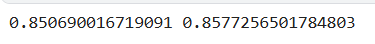

**32. Detailed Evaluation with Classification Report**

In [36]:
from sklearn.metrics import classification_report as cr

print(cr(y_train, dc.predict(X_train_trf)))
print("------------------")
print(cr(y_test, dc.predict(X_test_trf)))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.85      1.00      0.92     30020
         yes       0.00      0.00      0.00      5269

    accuracy                           0.85     35289
   macro avg       0.43      0.50      0.46     35289
weighted avg       0.72      0.85      0.78     35289

------------------
              precision    recall  f1-score   support

          no       0.86      1.00      0.92      3364
         yes       0.00      0.00      0.00       558

    accuracy                           0.86      3922
   macro avg       0.43      0.50      0.46      3922
weighted avg       0.74      0.86      0.79      3922



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

Here, we can see that, we are getting the f1 score = 0

**33. Visualizing the Confusion Matrix for Training Data******

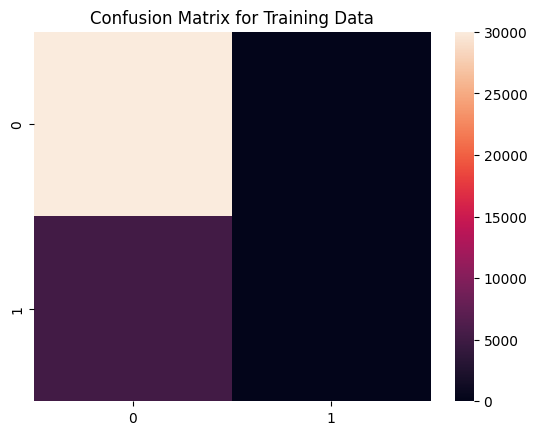

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cr = confusion_matrix(y_train, dc.predict(X_train_trf))

ax = sns.heatmap(cr)
ax.set_title("Confusion Matrix for Training Data");

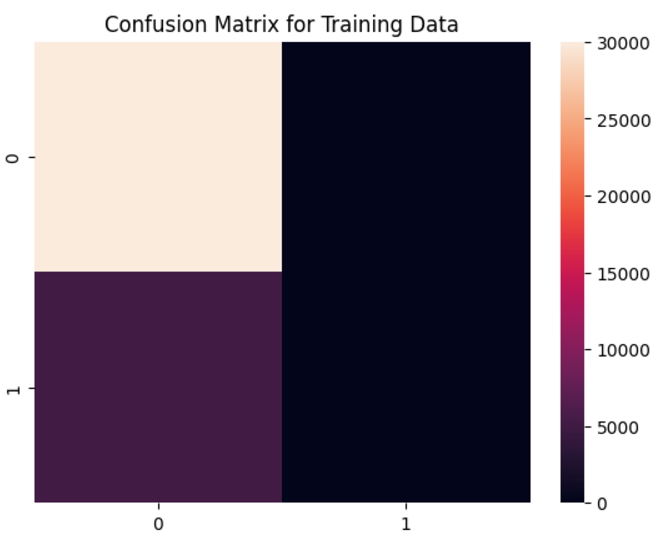

The confusion matrix shows that the model has a high accuracy for predicting the positive class (1) and a low accuracy for predicting the negative class (0). This indicates that the model is biased towards the positive class.

**34. LogisticRegression**

* Training and Evaluating Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=3)

lr.fit(X_train_trf,y_train)
print(accuracy_score(y_train, lr.predict(X_train_trf)),accuracy_score(y_test, lr.predict(X_test_trf)))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8513417778911275 0.8567057623661397


* Classification Report for Logistic Regression Model

In [39]:
from sklearn.metrics import classification_report as cr

print(cr(y_train, lr.predict(X_train_trf)))
print("------------------")
print(cr(y_test, lr.predict(X_test_trf)))

              precision    recall  f1-score   support

          no       0.86      0.98      0.92     30020
         yes       0.51      0.13      0.20      5269

    accuracy                           0.85     35289
   macro avg       0.69      0.55      0.56     35289
weighted avg       0.81      0.85      0.81     35289

------------------
              precision    recall  f1-score   support

          no       0.87      0.98      0.92      3364
         yes       0.49      0.13      0.21       558

    accuracy                           0.86      3922
   macro avg       0.68      0.55      0.56      3922
weighted avg       0.82      0.86      0.82      3922



Here, we can see that, the f1 score for yes is improved slightly

**35. Support Vector Machine (SVM)**

* Training and Evaluating LinearSVC Model

In [40]:
import time
from sklearn.svm import LinearSVC, SVC

l_svc = LinearSVC(random_state=42)
a = time.time()
l_svc.fit(X_train_trf, y_train)
b=time.time()

print(b-a)
print(accuracy_score(y_train, l_svc.predict(X_train_trf)),accuracy_score(y_test, l_svc.predict(X_test_trf)))

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


9.346870422363281
0.8496698687976423 0.8582355940846507


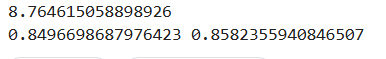

* Classification Report for LinearSVC Model

In [41]:
from sklearn.metrics import classification_report as cr

print(cr(y_train, l_svc.predict(X_train_trf)))
print("------------------")
print(cr(y_test, l_svc.predict(X_test_trf)))

              precision    recall  f1-score   support

          no       0.85      1.00      0.92     30020
         yes       0.19      0.00      0.00      5269

    accuracy                           0.85     35289
   macro avg       0.52      0.50      0.46     35289
weighted avg       0.75      0.85      0.78     35289

------------------
              precision    recall  f1-score   support

          no       0.86      1.00      0.92      3364
         yes       1.00      0.00      0.01       558

    accuracy                           0.86      3922
   macro avg       0.93      0.50      0.47      3922
weighted avg       0.88      0.86      0.79      3922



Here, again the f1 score is 0

* Training and Evaluating LinearSVC with Class Weight Adjustment

In [42]:
import time
from sklearn.svm import LinearSVC, SVC

l_svc = LinearSVC(random_state=42, class_weight="balanced")
a = time.time()
l_svc.fit(X_train_trf, y_train)
b=time.time()

print(b-a)
print(accuracy_score(y_train, l_svc.predict(X_train_trf)),accuracy_score(y_test, l_svc.predict(X_test_trf)))

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


8.349963188171387
0.7770693417212162 0.7654258031616522


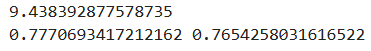

* Initializing an SVM with SGDClassifier

In [43]:
from sklearn.linear_model import SGDClassifier
svm_from_sgd = SGDClassifier(loss="hinge")


* Classification Report for LinearSVC Model


In [44]:
from sklearn.metrics import classification_report as cr

print(cr(y_train, l_svc.predict(X_train_trf)))
print("------------------")
print(cr(y_test, l_svc.predict(X_test_trf)))

              precision    recall  f1-score   support

          no       0.90      0.84      0.86     30020
         yes       0.32      0.44      0.37      5269

    accuracy                           0.78     35289
   macro avg       0.61      0.64      0.62     35289
weighted avg       0.81      0.78      0.79     35289

------------------
              precision    recall  f1-score   support

          no       0.89      0.82      0.86      3364
         yes       0.28      0.41      0.33       558

    accuracy                           0.77      3922
   macro avg       0.59      0.62      0.60      3922
weighted avg       0.81      0.77      0.78      3922



Here, the f1 score is improved.

* Cross-Validation Scores for LinearSVC Model

In [45]:
from sklearn.model_selection import cross_val_score

c = cross_val_score(l_svc, cv=5, X = X_train_trf, y=y_train)
c.mean(), c.std()

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.7125489230651609, 0.21908554258368843)

Here,
Mean = 0.7125489230651609, Standard Deviation = 0.21908554258368843

# Hyper Parameter Tuning

**36. Importing GridSearchCV and RandomizedSearchCV**

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


**37. Hyperparameter Tuning for Logistic Regression using GridSearchCV**

In [47]:
model = LogisticRegression(random_state=3, class_weight="balanced")
param_grid = {
    'penalty' : ['l1','l2'],
    'C' : [0.01,0.1,1,10],
    'solver' : ['newton-cholesky','saga']
}

**38. Randomized Search CV**


* Randomized Search Cross-Validation for Logistic Regression Model


In [48]:
rscv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

* Fitting the Randomized Search Cross-Validation for Logistic Regression Model

In [49]:
# rscv.fit(X_train_trf,y_train)

* Best Hyperparameters from Randomized Search Cross-Validation

In [50]:
# rscv.best_params_

* Best Score from Randomized Search Cross-Validation

In [51]:
# rscv.best_score_

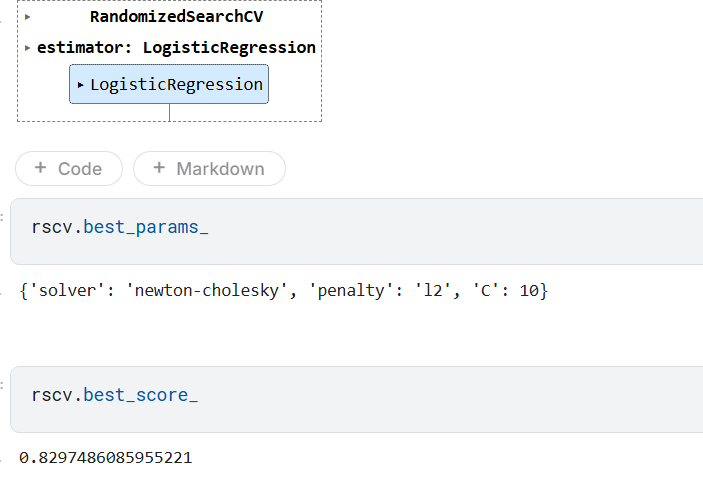

* Test Accuracy of the Best Model from Randomized Search Cross-Validation

In [52]:
# best_model = rscv.best_estimator_

# # Evaluate the model on the test set
# test_accuracy = accuracy_score(y_test, best_model.predict(X_test_trf))
# print("Test accuracy: ", test_accuracy)

**39. Grid Search CV**

* Fitting the Grid Search Cross-Validation for Logistic Regression Model

* Best Hyperparameters and Best Score from Grid Search Cross-Validation

In [53]:
# gscv = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# gscv.fit(X_train_trf,y_train)

In [54]:
# print(gscv.best_params_)
# print(gscv.best_score_)

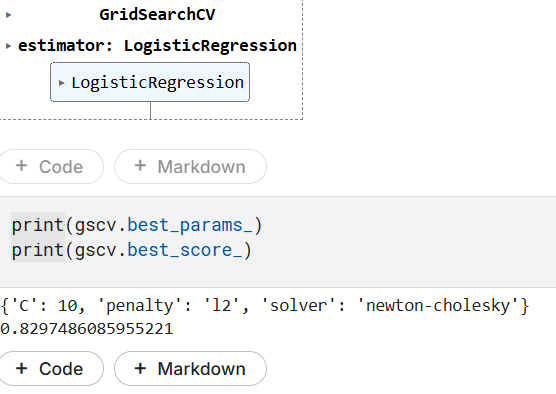

* Test Accuracy and Predictions of the Best Model from Grid Search Cross-Validation

In [55]:
# best_model = gscv.best_estimator_

# # Evaluate the model on the test set
# test_accuracy = accuracy_score(y_test, best_model.predict(X_test_trf))
# print("Test accuracy: ", test_accuracy)
# y_pred=best_model.predict(X_test_trf)

I commented out the rscv and gscv part because they are taking a lot of time during submission final notebook. But i pasted the outputs which i were getting when i run those cells, in the markdown.

# Submission

# Decision Trees

In [56]:
# import pandas as pd
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split

In [57]:
# train = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
# test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')


In [58]:
# train['last_contact_date'] = pd.to_datetime(train['last contact date'])
# test['last_contact_date'] = pd.to_datetime(test['last contact date'])

# train['contact_year'] = train['last_contact_date'].dt.year
# train['contact_month'] = train['last_contact_date'].dt.month
# train['contact_day'] = train['last_contact_date'].dt.day

# test['contact_year'] = test['last_contact_date'].dt.year
# test['contact_month'] = test['last_contact_date'].dt.month
# test['contact_day'] = test['last_contact_date'].dt.day

# # Drop the original 'last contact date' column
# train = train.drop(columns=['last contact date', 'last_contact_date'])
# test = test.drop(columns=['last contact date', 'last_contact_date'])

In [59]:
# label_encoder = LabelEncoder()
# train['target'] = label_encoder.fit_transform(train['target'])

In [60]:
# categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
# for col in categorical_columns:
#     train[col] = label_encoder.fit_transform(train[col])
#     test[col] = label_encoder.transform(test[col])

In [61]:
# X_train = train.drop(columns=['target'])
# y_train = train['target']
# X_test = test

In [62]:
# dt = DecisionTreeClassifier(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2']
# }

In [63]:
# grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the model with grid search
# grid_search.fit(X_train, y_train)

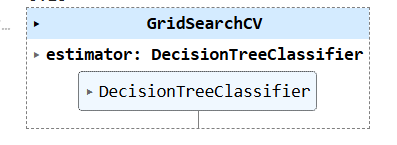

In [64]:
# print("Best Parameters:", grid_search.best_params_)

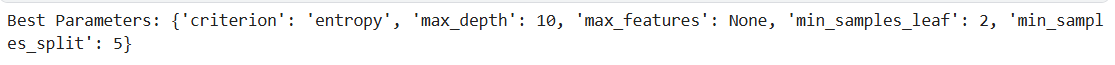

In [65]:
# best_model = grid_search.best_estimator_


In [66]:
# y_pred = best_model.predict(X_test)

In [67]:
# # Convert predictions from 0/1 to 'yes'/'no' using LabelEncoder
# predictions_yes_no = label_encoder.inverse_transform(y_pred)

# # Create the submission DataFrame
# submission = pd.DataFrame({
#     'Id': range(len(X_test)),  # Generate IDs based on the row index
#     'Prediction': predictions_yes_no  # Add the converted predictions
# })

# # Save predictions to a CSV file
# submission.to_csv('submission.csv', index=False)


**I got 0.46260 public score by using Decision Trees model**

# LogisticRegression

In [68]:
# import pandas as pd
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split

In [69]:
# train = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
# test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')


In [70]:
# train['last_contact_date'] = pd.to_datetime(train['last contact date'])
# test['last_contact_date'] = pd.to_datetime(test['last contact date'])

# train['contact_year'] = train['last_contact_date'].dt.year
# train['contact_month'] = train['last_contact_date'].dt.month
# train['contact_day'] = train['last_contact_date'].dt.day

# test['contact_year'] = test['last_contact_date'].dt.year
# test['contact_month'] = test['last_contact_date'].dt.month
# test['contact_day'] = test['last_contact_date'].dt.day

# # Drop the original 'last contact date' column
# train = train.drop(columns=['last contact date', 'last_contact_date'])
# test = test.drop(columns=['last contact date', 'last_contact_date'])

In [71]:
# train.drop(['contact','poutcome'],axis=1,inplace=True)

In [72]:
# test.drop(['contact','poutcome'],axis=1,inplace=True)

In [73]:
# train.isna().sum()

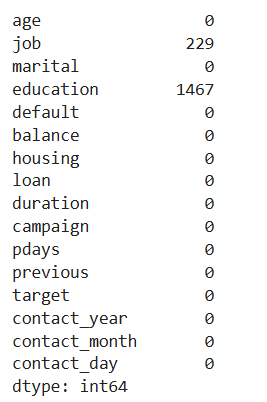

In [74]:
# train['job']=train['job'].fillna(train['job'].mode().iloc[0])
# train['education']=train['education'].fillna(train['education'].mode().iloc[0])

In [75]:
# test['job']=test['job'].fillna(test['job'].mode().iloc[0])
# test['education']=test['education'].fillna(test['education'].mode().iloc[0])

In [76]:
# X_test.isna().sum()

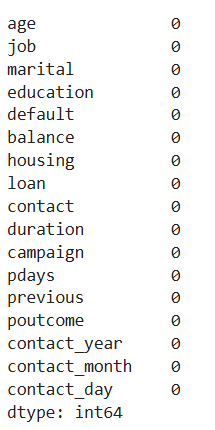

In [77]:
# X_train = train.drop(columns=['target'])
# y_train = train['target']
# X_test = test

In [78]:
# X_train.isna().sum()

In [79]:
# for i,j in enumerate(list(X_train.columns)):
#     print(i,j,X_train[j].dtypes)

In [80]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler

# cat_pipe = Pipeline([("imputer",SimpleImputer(strategy="most_frequent")),
#                              ("ohe",OneHotEncoder(handle_unknown="ignore",sparse_output=False))])


# cat_trf = ColumnTransformer([('cat',cat_pipe,[1,2,3,4,6,7])],
#                            remainder= "passthrough").set_output(transform="pandas")

# num_pipe = Pipeline([("imputer",SimpleImputer(strategy="mean")),
#                              ("std",StandardScaler())])

# num_trf = ColumnTransformer([('num',num_pipe,[0,5,8,9,10,11,12,13,14,15])],
#                            remainder= "passthrough").set_output(transform="pandas")

# pipe = Pipeline([("cat_pipe", cat_trf),
#                  ('num_pipe',num_trf)])

# pipe.fit(X_train)

In [81]:
# X_train_trf = pipe.transform(X_train)

In [82]:
# X_train_trf.head()

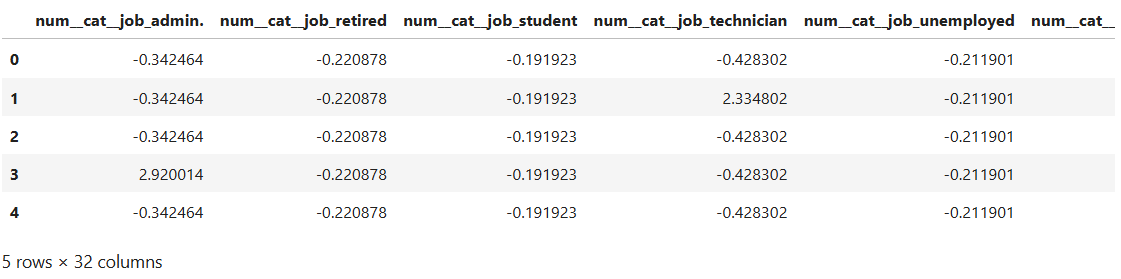

In [83]:
# for i,j in enumerate(list(X_test.columns)):
#     print(i,j,X_train[j].dtypes)

In [84]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler

# cat_pipe = Pipeline([("imputer",SimpleImputer(strategy="most_frequent")),
#                              ("ohe",OneHotEncoder(handle_unknown="ignore",sparse_output=False))])


# cat_trf = ColumnTransformer([('cat',cat_pipe,[1,2,3,4,6,7])],
#                            remainder= "passthrough").set_output(transform="pandas")

# num_pipe = Pipeline([("imputer",SimpleImputer(strategy="mean")),
#                              ("std",StandardScaler())])

# num_trf = ColumnTransformer([('num',num_pipe,[0,5,8,9,10,11,12,13,14,15])],
#                            remainder= "passthrough").set_output(transform="pandas")

# pipe = Pipeline([("cat_pipe", cat_trf),
#                  ('num_pipe',num_trf)])

# pipe.fit(X_test)

In [85]:
# X_test_trf = pipe.transform(X_test)

In [86]:
# X_test_trf.head()

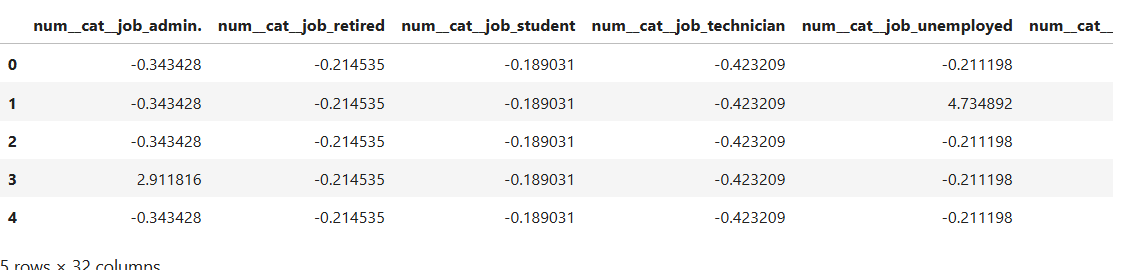

In [87]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [88]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(random_state=3, class_weight="balanced")
# param_grid = {
#     'penalty' : ['l1','l2'],
#     'C' : [0.01,0.1,1,10],
#     'solver' : ['newton-cholesky','saga']
# }

In [89]:
# rscv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [90]:
# rscv.fit(X_train_trf, y_train)

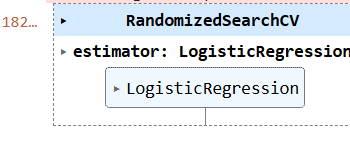

In [91]:
# print("Best Parameters:", rscv.best_params_)

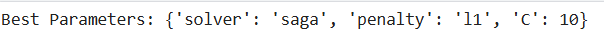

In [92]:
# best_model = rscv.best_estimator_

In [93]:
# y_pred = best_model.predict(X_test_trf)

In [94]:
# # Convert predictions from 0/1 to 'yes'/'no' using LabelEncoder
# # predictions_yes_no = has(y_pred)

# # Create the submission DataFrame
# submission = pd.DataFrame({
#     'id': range(len(X_test)),  # Generate IDs based on the row index
#     'target': y_pred  # Add the converted predictions
# })

# # Save predictions to a CSV file
# submission.to_csv('submission.csv', index=False)

**I got 0.69365 public score by using LogisticRegression model**

# XGBOOST CLASSIFIER MODEL

In [95]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [96]:
train = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

In [97]:
train['last_contact_date'] = pd.to_datetime(train['last contact date'])
test['last_contact_date'] = pd.to_datetime(test['last contact date'])

train['contact_year'] = train['last_contact_date'].dt.year
train['contact_month'] = train['last_contact_date'].dt.month
train['contact_day'] = train['last_contact_date'].dt.day

test['contact_year'] = test['last_contact_date'].dt.year
test['contact_month'] = test['last_contact_date'].dt.month
test['contact_day'] = test['last_contact_date'].dt.day

In [98]:
train = train.drop(columns=['last contact date', 'last_contact_date'])
test = test.drop(columns=['last contact date', 'last_contact_date'])

In [99]:
train.drop(['contact', 'poutcome'], axis=1, inplace=True)
test.drop(['contact', 'poutcome'], axis=1, inplace=True)

In [100]:
train['job'] = train['job'].fillna(train['job'].mode().iloc[0])
train['education'] = train['education'].fillna(train['education'].mode().iloc[0])

test['job'] = test['job'].fillna(test['job'].mode().iloc[0])
test['education'] = test['education'].fillna(test['education'].mode().iloc[0])

In [101]:
X_train = train.drop(columns=['target'])
y_train = train['target']
X_test = test

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [103]:
cat_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                     ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

cat_trf = ColumnTransformer([('cat', cat_pipe, [1, 2, 3, 4, 6, 7])],
                            remainder="passthrough").set_output(transform="pandas")

# Numerical pipeline
num_pipe = Pipeline([("imputer", SimpleImputer(strategy="mean")),
                     ("std", StandardScaler())])

num_trf = ColumnTransformer([('num', num_pipe, [0, 5, 8, 9, 10, 11, 12, 13, 14, 15])],
                            remainder="passthrough").set_output(transform="pandas")

# Full pipeline
pipe = Pipeline([("cat_pipe", cat_trf),
                 ('num_pipe', num_trf)])

pipe.fit(X_train)

Pipeline(steps=[('cat_pipe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [1, 2, 3, 4, 6, 7])])),
                ('num_pipe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  [0, 5, 8, 9, 10, 11, 12, 13,
                                                   14, 15])]))])

In [104]:
X_train_trf = pipe.transform(X_train)

In [105]:
pipe.fit(X_test)
X_test_trf = pipe.transform(X_test)

In [106]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [2],  # Set scale_pos_weight to 2 for handling class imbalance
}

In [107]:
model = XGBClassifier(random_state=3, use_label_encoder=False, eval_metric='logloss')

In [108]:
rscv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [109]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels (y_train) from ['yes', 'no'] to [1, 0]
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Now proceed with the model fitting using y_train_encoded
rscv.fit(X_train_trf, y_train_encoded)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=3, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'scale_pos_weight': [2],
                                        'subsample': [0.8, 1.0]},
                   scoring='accuracy')

In [110]:
best_model = rscv.best_estimator_


In [111]:
y_pred = best_model.predict(X_test_trf)

In [112]:
y_pred_decoded = label_encoder.inverse_transform(y_pred)

In [113]:
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test_trf)

# Decode the predictions back to 'yes'/'no'
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Classification report for training data predictions
y_train_pred = best_model.predict(X_train_trf)
y_train_pred_decoded = label_encoder.inverse_transform(y_train_pred)

print("Classification Report (Training Data):\n")
print(classification_report(y_train, y_train_pred_decoded))

Classification Report (Training Data):

              precision    recall  f1-score   support

          no       0.95      0.91      0.93     33384
         yes       0.58      0.73      0.65      5827

    accuracy                           0.88     39211
   macro avg       0.77      0.82      0.79     39211
weighted avg       0.90      0.88      0.89     39211



In [114]:
submission = pd.DataFrame({
    'id': range(len(X_test)),  # Generate IDs based on the row index
    'target': y_pred_decoded  # Add the decoded predictions
})

# Save predictions to a CSV file
submission.to_csv('submission.csv', index=False)

**I got 0.76031 public score by using XGBoost Classifier model**

# RandomForest

In [115]:
# import pandas as pd
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split

In [116]:
# train = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
# test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

In [117]:
# train['last_contact_date'] = pd.to_datetime(train['last contact date'])
# test['last_contact_date'] = pd.to_datetime(test['last contact date'])

# train['contact_year'] = train['last_contact_date'].dt.year
# train['contact_month'] = train['last_contact_date'].dt.month
# train['contact_day'] = train['last_contact_date'].dt.day

# test['contact_year'] = test['last_contact_date'].dt.year
# test['contact_month'] = test['last_contact_date'].dt.month
# test['contact_day'] = test['last_contact_date'].dt.day

# # Drop the original 'last contact date' column
# train = train.drop(columns=['last contact date', 'last_contact_date'])
# test = test.drop(columns=['last contact date', 'last_contact_date'])

In [118]:
# train.drop(['contact', 'poutcome'], axis=1, inplace=True)
# test.drop(['contact', 'poutcome'], axis=1, inplace=True)

# # Fill missing values
# train['job'] = train['job'].fillna(train['job'].mode().iloc[0])
# train['education'] = train['education'].fillna(train['education'].mode().iloc[0])

# test['job'] = test['job'].fillna(test['job'].mode().iloc[0])
# test['education'] = test['education'].fillna(test['education'].mode().iloc[0])

In [119]:
# X_train = train.drop(columns=['target'])
# y_train = train['target']
# X_test = test


In [120]:
# X_train.isna().sum()

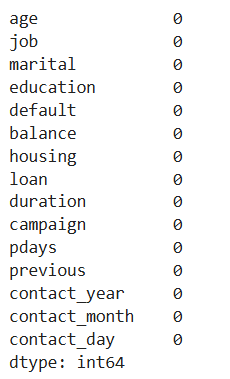

In [121]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [122]:
# # Categorical features pipeline
# cat_pipe = Pipeline([
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
# ])

# cat_trf = ColumnTransformer([('cat', cat_pipe, [1, 2, 3, 4, 6, 7])], remainder="passthrough").set_output(transform="pandas")

# # Numerical features pipeline
# num_pipe = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),
#     ("std", StandardScaler())
# ])

# num_trf = ColumnTransformer([('num', num_pipe, [0, 5, 8, 9, 10, 11, 12, 13, 14, 15])], remainder="passthrough").set_output(transform="pandas")

# # Combining categorical and numerical pipelines
# pipe = Pipeline([("cat_pipe", cat_trf), ('num_pipe', num_trf)])

# # Fit and transform the training data
# pipe.fit(X_train)

# X_train_trf = pipe.transform(X_train)

In [123]:
# pipe.fit(X_test)

# X_test_trf = pipe.transform(X_test)

In [124]:
# model = RandomForestClassifier(random_state=3, class_weight="balanced")

In [125]:
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],
#     'max_depth': [5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

In [126]:
# rscv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [127]:
# rscv.fit(X_train_trf, y_train)

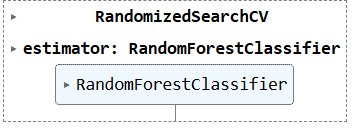

In [128]:
# print("Best Parameters:", rscv.best_params_)

# # Best model from RandomizedSearchCV
# best_model = rscv.best_estimator_

# # Predict on the test data
# y_pred = best_model.predict(X_test_trf)

# # Convert predictions from 0/1 to 'yes'/'no'
# y_pred_converted = ['yes' if pred == 1 else 'no' for pred in y_pred]

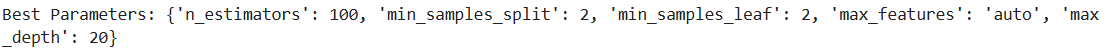

In [129]:
# from sklearn.metrics import classification_report
# print(classification_report(y_train, best_model.predict(X_train_trf)))

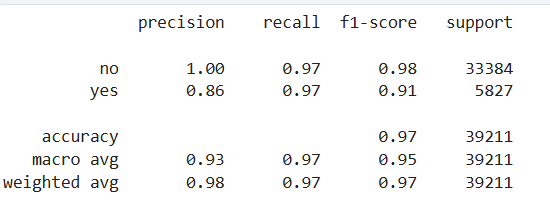

In [130]:
# submission = pd.DataFrame({
#     'id': range(len(X_test)),  # Generate IDs based on the row index
#     'target': y_pred_converted  # Add the converted predictions
# })

# # Save predictions to a CSV file
# submission.to_csv('submission.csv', index=False)

**I got 0.46260 public score by using RandomForest model**

# Comparision Chart for all Models

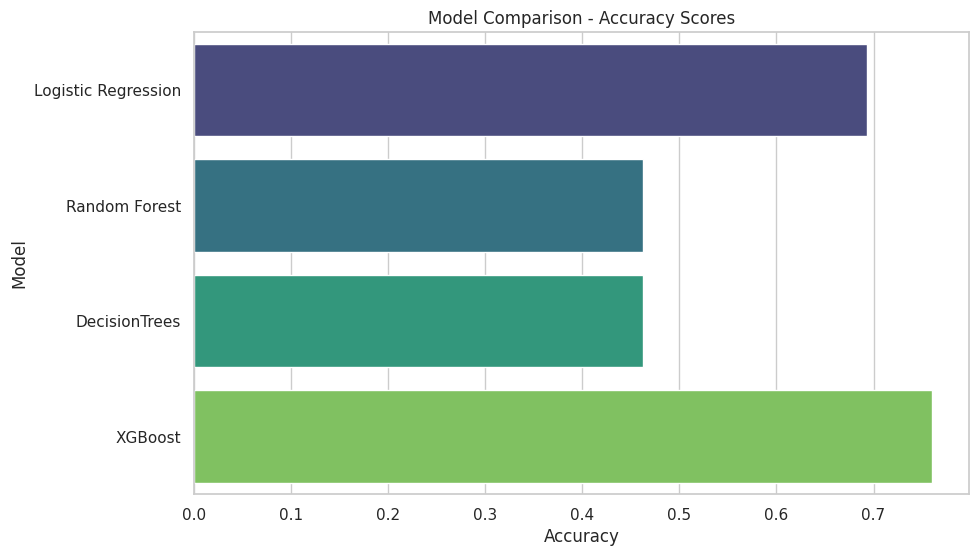

In [131]:
models = ['Logistic Regression', 'Random Forest', 'DecisionTrees', 'XGBoost']
accuracies = [0.69365, 0.46260, 0.46260, 0.76031]


data = {'Model': models, 'Accuracy': accuracies}
df = pd.DataFrame(data)


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=df, palette='viridis')
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

# As we can see from the above graph, XGBoost has got the highest accuracy score. Therefore we will use XGBoost Model for predicting our outputs.

In [132]:
print(submission.head())  

   id target
0   0     no
1   1     no
2   2     no
3   3     no
4   4    yes
